# TASK 2 - TO EXPLORE SUPERVISED LEARNING

Predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
sk = pd.read_csv('C:\\Users\\Karthik Sankaran\\Downloads\\student_scores.csv')

In [8]:
sk

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
sk.shape

(25, 2)

In [11]:
sk.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


VISUALISNG DATA

In [14]:
import seaborn as sns

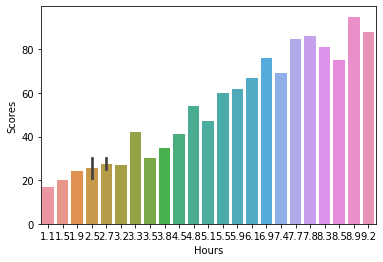

In [15]:
sns.barplot(x = 'Hours',y ='Scores',data = sk)

In [17]:
sk.isnull().sum()

Hours     0
Scores    0
dtype: int64

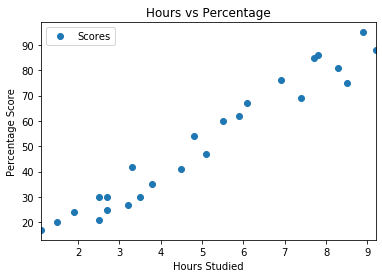

In [18]:
sk.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

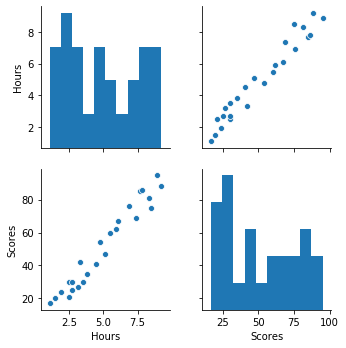

In [19]:
sns.pairplot(sk)

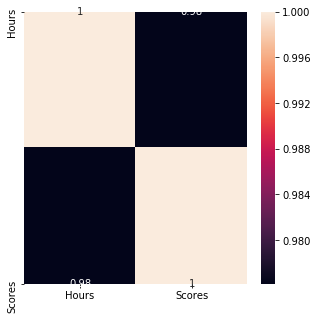

In [25]:
corrmat = sk.corr()
fig,ax = plt.subplots(figsize = (5,5))
sns.heatmap(corrmat , annot = True , annot_kws ={'size':10} )

In [28]:
x = sk.iloc[:, :-1].values
y = sk.iloc[:,1].values
x
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [30]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

In [31]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

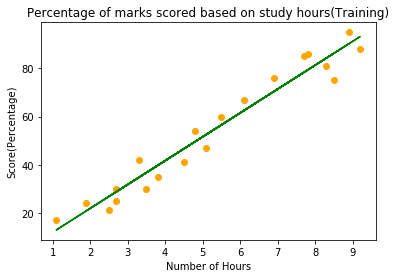

In [36]:
plt.scatter(x_train,y_train,color="orange")
plt.plot(x_train,regr.predict(x_train), color="green")
plt.title("Percentage of marks scored based on study hours(Training)")
plt.xlabel("Number of Hours")
plt.ylabel("Score(Percentage)")
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit(x_train,y_train)
lnr_pred = lnr.predict(x_test)

In [35]:
print(x_test)
y_predict = regr.predict(x_test)
y_predict


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

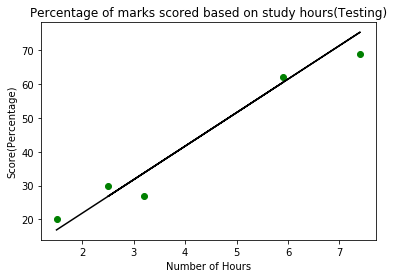

In [40]:
plt.scatter(x_test,y_test,color="green")
plt.plot(x_test,regr.predict(x_test), color="black")
plt.title("Percentage of marks scored based on study hours(Testing)")
plt.xlabel("Number of Hours")
plt.ylabel("Score(Percentage)")
plt.show()

In [41]:
print("Enter the number of hours you study ")
n = float(input())

Enter the number of hours you study 
9.5


In [42]:
df_mks = pd.DataFrame({"Actual":y_test, "Predicted":y_predict})
df_mks

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [43]:
no_hrs = 9.25
print("Number of hours the student studied: ",no_hrs)
print("Predicted score for the student: ",regr.predict(np.array(no_hrs).reshape(1,-1))[0])


Number of hours the student studied:  9.25
Predicted score for the student:  93.69173248737538
